In [1]:
import pandas as pd
import numpy as np

In [2]:
import glob
files = glob.glob("us_raw_data/adult.csv/*.csv")
files

['us_raw_data/adult.csv\\adult.csv']

In [3]:
df = pd.read_csv(files[0])
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [5]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

## Occupation:

- Take 6 highest occupations (instead of other-service, get 'Handlers-cleaners-farming-fishing' as one category), get a 20 designations for each type.

In [6]:
df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

(array([2410., 3160., 2461., 3429., 3465., 2583., 3198., 2965., 1828.,
        2139., 1558., 1033.,  996.,  599.,  269.,  227.,  120.,   54.,
          20.,   47.]),
 array([17.  , 20.65, 24.3 , 27.95, 31.6 , 35.25, 38.9 , 42.55, 46.2 ,
        49.85, 53.5 , 57.15, 60.8 , 64.45, 68.1 , 71.75, 75.4 , 79.05,
        82.7 , 86.35, 90.  ]),
 <BarContainer object of 20 artists>)

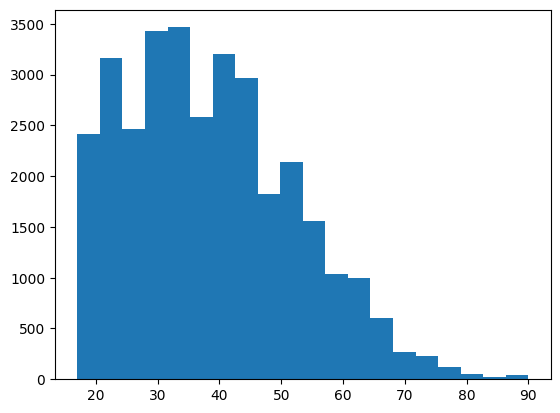

In [7]:
## plot age distribution
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20)

In [11]:
## Divide age into 4 contiguous groups of equal size.
df['age_group'] = pd.qcut(df['age'], q=4)
df['age_group'].value_counts()

age_group
(16.999, 28.0]    8898
(37.0, 48.0]      8241
(28.0, 37.0]      7783
(48.0, 90.0]      7639
Name: count, dtype: int64

## Age:

- Decide age of the agent based on probability weighted by this distribution.
- Age groups decided based on where contiguous cuts decided earlier.

In [8]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

## Income:


Thoughts:

- `>=50k` and `<50k` are not very useful indicators of economic status.
- So, we need to generate the income groups manually.
- Expected high correlation between income and profession & income and age, a random value might be an inaccurate representation of any sample.
- But we dont want intend to have a 'real' or 'accurate' representation of population, infact, would be better for this feature to be independent so that our observations at the end can be better and analysis becomes easier.

ChatGPT helps to do this in a better way.

<img src="./assets/chatgpt_us_income_groups.png" height="500"></img>

## Interests:

Similarily for hobbies:

<img src="./assets/chatgpt_hobbies.png" height="500"></img> 

In [9]:
hobbies = [
    ["painting", "writing", "photography", "crafting", "playing musical instruments", 
     "knitting", "sewing", "pottery", "calligraphy", "graphic design"],  # Creative Hobbies
    
    ["sports", "yoga", "hiking", "dancing", "martial arts", 
     "swimming", "cycling", "running", "rock climbing", "aerobics"],  # Physical Hobbies
    
    ["reading", "puzzles", "coding", "learning languages", "chess", 
     "studying history", "solving riddles", "philosophy", "writing algorithms", "researching science"],  # Intellectual Hobbies
    
    ["volunteering", "team sports", "hosting events", "joining clubs", "networking", 
     "attending meetups", "group gaming", "organizing charity events", "debating", "community gardening"],  # Social Hobbies
    
    ["stamp collecting", "coin collecting", "vintage items", "book collecting", "trading cards", 
     "comic books", "art collecting", "toy collecting", "souvenir collecting", "antique collecting"]  # Collecting Hobbies
]

In [16]:
import json

hobby_keys = ["creative", "physical", "intellectual", "social", "collecting"]
hobby_dict = dict(zip(hobby_keys, hobbies))
with open("dump/hobbies.json", "w") as f:
    json.dump(hobby_dict, f, indent=4)

In [12]:
# Prof-Specialty
prof_specialty = [
    "Doctor",
    "Lawyer",
    "Engineer",
    "Scientist",
    "Architect",
    "Professor",
    "Pharmacist",
    "Veterinarian",
    "Psychologist",
    "Dentist"
]

# Craft-Repair
craft_repair = [
    "Carpenter",
    "Electrician",
    "Plumber",
    "Mechanic",
    "Welder",
    "Mason",
    "Blacksmith",
    "Painter",
    "Tailor",
    "Jeweler"
]

# Exec-Managerial
exec_managerial = [
    "CEO",
    "CFO",
    "Project Manager",
    "Marketing Director",
    "Operations Manager",
    "Product Manager",
    "HR Manager",
    "Sales Director",
    "Financial Analyst",
    "Supply Chain Manager"
]

# Adm-Clerical
adm_clerical = [
    "Administrative Assistant",
    "Secretary",
    "Receptionist",
    "Data Entry Clerk",
    "Office Manager",
    "Clerical Assistant",
    "Mailroom Clerk",
    "Scheduler",
    "Billing Clerk",
    "File Clerk"
]

# Sales
sales = [
    "Sales Representative",
    "Retail Salesperson",
    "Real Estate Agent",
    "Insurance Agent",
    "Car Salesperson",
    "Account Executive",
    "Telemarketer",
    "Sales Manager",
    "Pharmaceutical Sales Representative",
    "Inside Sales Associate"
]

# Handlers-Cleaners-Farming-Fishing
handlers_cleaners_farming_fishing = [
    "Janitor",
    "Cleaner",
    "Garbage Collector",
    "Farm Worker",
    "Fisherman",
    "Gardener",
    "Landscaper",
    "Pest Control Worker",
    "Groundskeeper",
    "Aquaculture Technician"
]


In [15]:
import json
import inspect

def nameof(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

all_professions_l = [prof_specialty, craft_repair, exec_managerial, adm_clerical, sales, handlers_cleaners_farming_fishing]
all_professions = {}
for li in all_professions_l:
    all_professions[nameof(li)] = li

with open("dump/us/glossary_professions.json", "w") as f:
    json.dump(all_professions, f, indent=2)